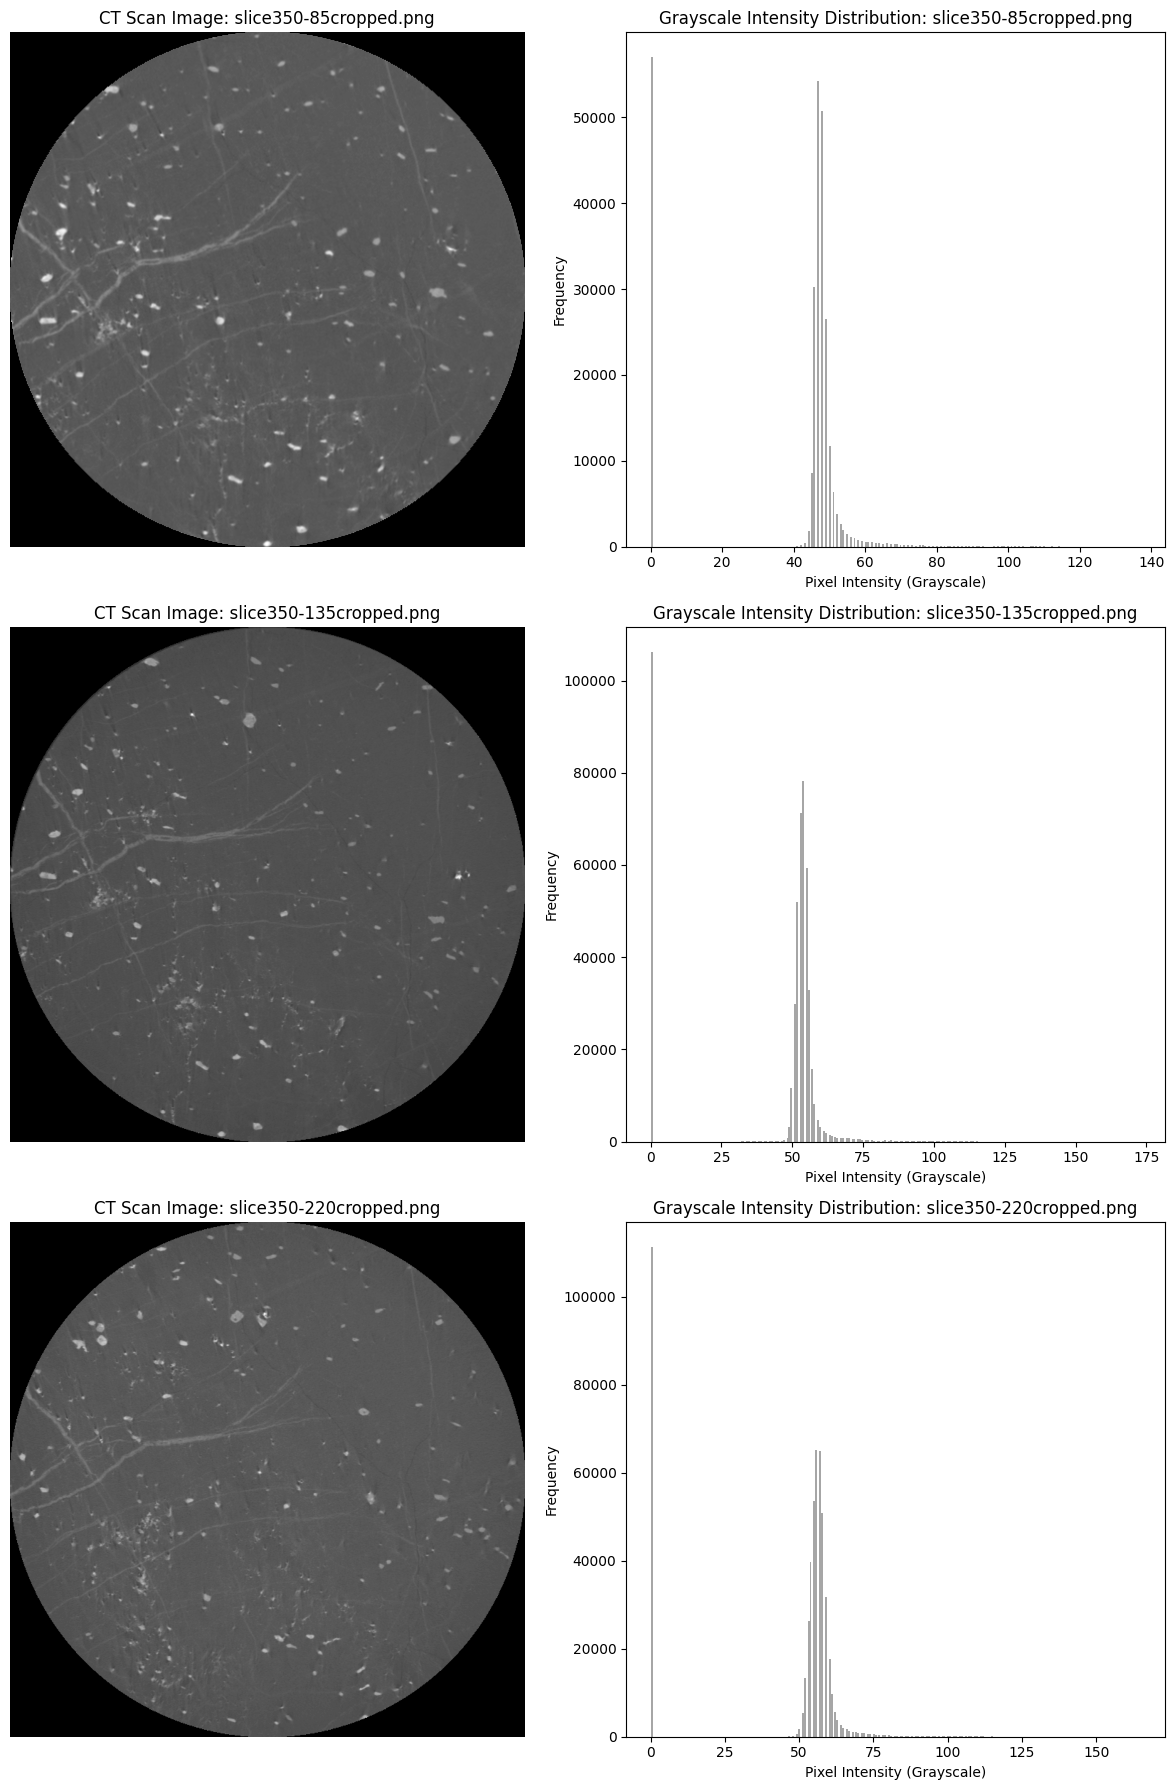

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Folder path
folder_path = "/Users/anna/Desktop/XCT"

# Filenames
image_files = ["slice350-85cropped.png", "slice350-135cropped.png", "slice350-220cropped.png"]

# Create a figure for the images and histograms
plt.figure(figsize=(12, 6 * len(image_files)))


for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Display CT image
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"CT Scan Image: {image_file}")
    plt.axis("off")
    
    # Plot grayscale intensities
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.hist(ct_array.flatten(), bins=256, color="gray", alpha=0.7)
    plt.title(f"Grayscale Intensity Distribution: {image_file}")
    plt.xlabel("Pixel Intensity (Grayscale)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



Adjust Thresholds:

lower_threshold and upper_threshold define the intensity range for segmentation. Based on the histogram, you can adjust these to isolate the desired material (e.g., carbonates).
Experiment with these values to fine-tune the segmentation.


The segmented image will display only the pixels falling within the specified intensity range, which are likely candidates for carbonates.

Masking: The mask isolates pixels in the grayscale range of interest.
Segmentation: The segmented image is created by retaining only the masked pixels while setting others to zero

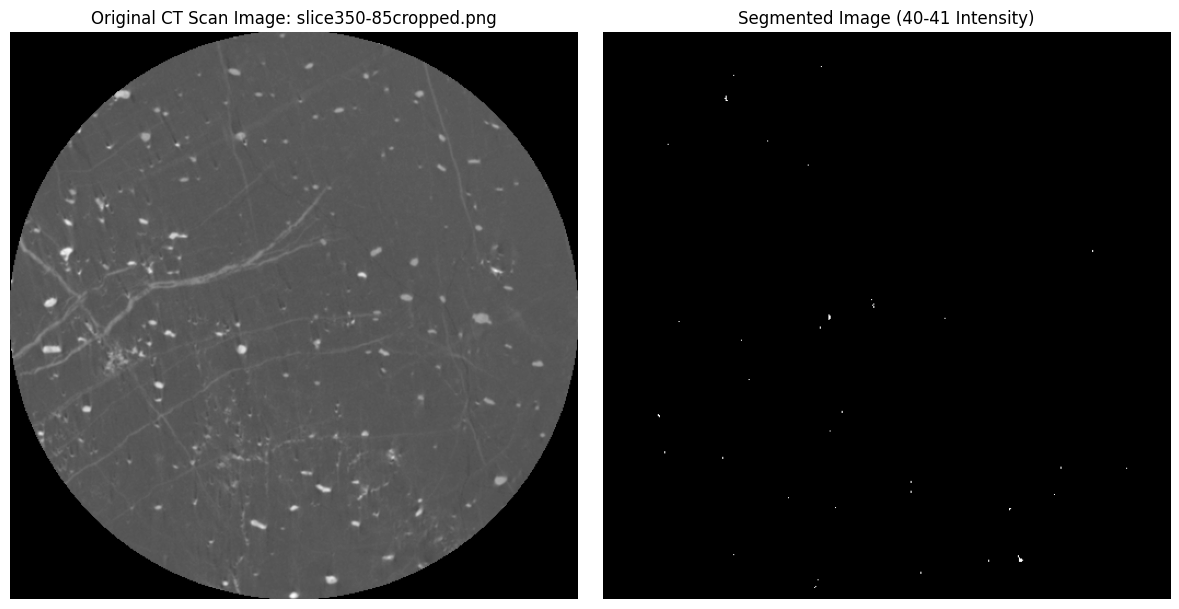

In [24]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT"

# Filenames
image_files = ["slice350-85cropped.png"]

# Define intensity thresholds for segmentation set - what do each of these mean...?
#lower_threshold = 54   # Minimum grayscale intensity for carbonates
#upper_threshold = 55  # Maximum grayscale intensity for carbonates

#lower_threshold = 40
#upper_threshold = 41

# Create a figure for the images and segmented images
plt.figure(figsize=(12, 6 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a segmented image by applying the mask
    segmented_image = np.zeros_like(ct_array)
    segmented_image[segmented_mask] = ct_array[segmented_mask]
    
    # Plot the original image and the segmented image
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title(f"Segmented Image ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-350-segmented.png')
plt.show()


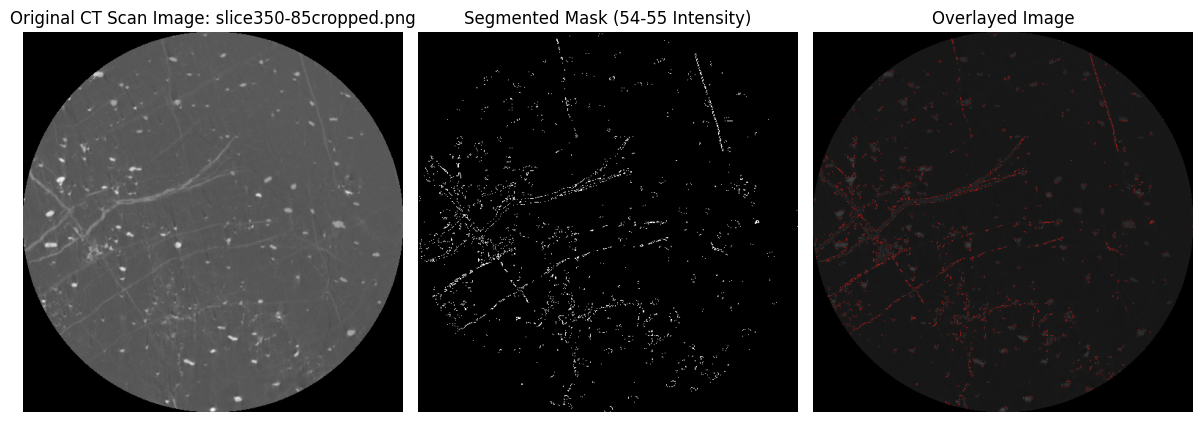

In [41]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT"

# Filenames
image_files = ["slice350-85cropped.png"]

# Define intensity thresholds for segmentation
#lower_threshold = 43  # Minimum grayscale intensity for carbonates
#upper_threshold = 44  # Maximum grayscale intensity for carbonates

#lower_threshold = 44
#upper_threshold = 45

#MATRIX
#lower_threshold = 46
#upper_threshold = 48

#lower_threshold = 51
#upper_threshold = 52

#lower_threshold = 52
#upper_threshold = 53

#lower_threshold = 53
#upper_threshold = 54

lower_threshold = 54
upper_threshold = 55

# Create a figure for the images and overlays
plt.figure(figsize=(12, 9 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a color overlay with transparency
    overlay = np.zeros((*ct_array.shape, 3), dtype=np.uint8)  # Create an RGB image
    overlay[..., 0] = 255  # Red channel for the overlay
    overlay[~segmented_mask] = 0  # Set non-segmented areas to black
    
    # Combine original image and overlay using alpha blending
    alpha = 0.5  # Transparency level (0 = fully transparent, 1 = fully opaque)
    overlayed_image = np.dstack([ct_array] * 3)  # Convert grayscale to RGB
    overlayed_image = overlayed_image * (1 - alpha) + overlay * alpha
    
    # Plot the original, segmented, and overlayed images
    plt.subplot(len(image_files), 3, 3 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 2)
    plt.imshow(segmented_mask, cmap="gray")
    plt.title(f"Segmented Mask ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 3)
    plt.imshow(overlayed_image.astype(np.uint8))
    plt.title(f"Overlayed Image")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-85-350-segmented(40-41).png')
plt.show()


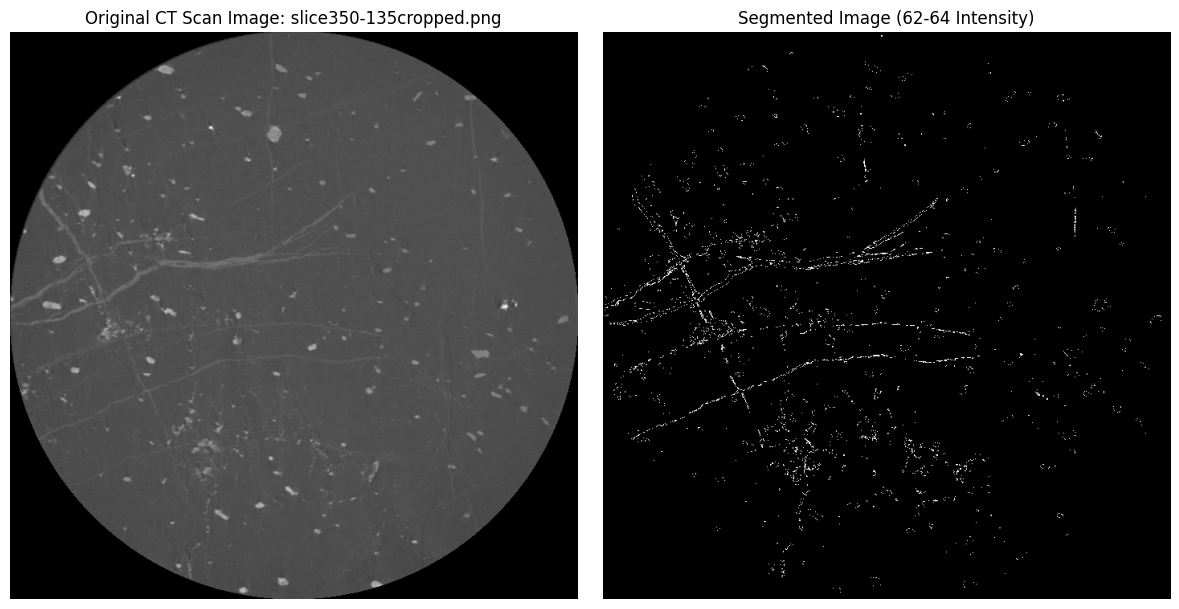

In [27]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT"

# Filenames
image_files = ["slice350-135cropped.png"]

# Define intensity thresholds for segmentation set - what do each of these mean...?
lower_threshold = 62   # Minimum grayscale intensity for carbonates
upper_threshold = 64 # Maximum grayscale intensity for carbonates

# Create a figure for the images and segmented images
plt.figure(figsize=(12, 6 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a segmented image by applying the mask
    segmented_image = np.zeros_like(ct_array)
    segmented_image[segmented_mask] = ct_array[segmented_mask]
    
    # Plot the original image and the segmented image
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title(f"Segmented Image ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-350-segmented.png')
plt.show()

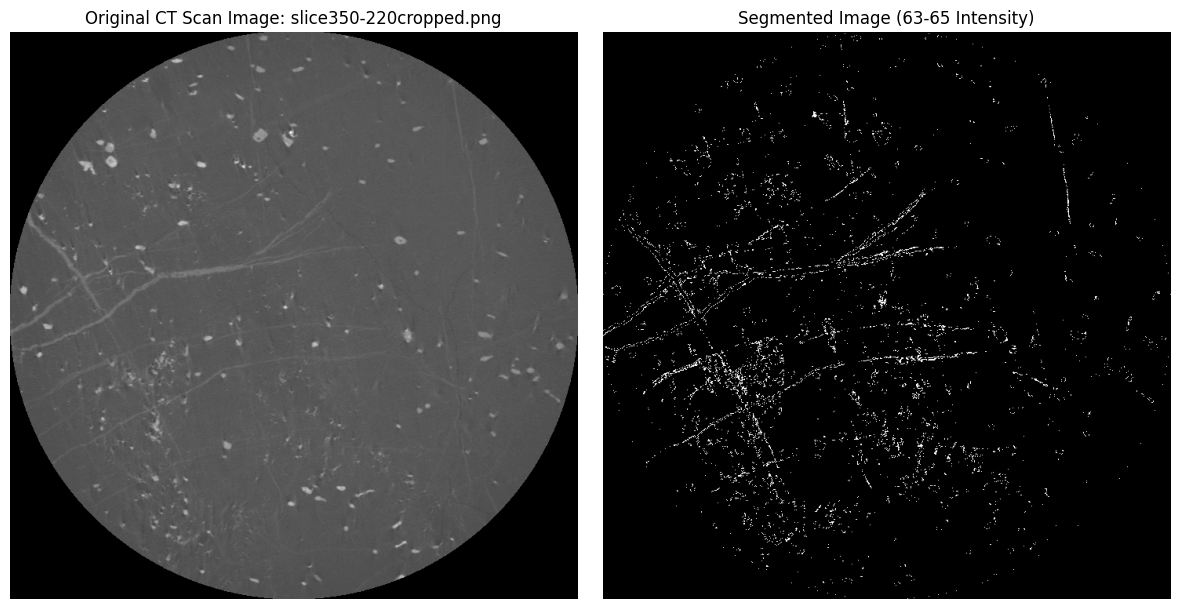

In [14]:
# List of specific image filenames
image_files = [ "slice350-220cropped.png"]

# Define intensity thresholds for segmentation (adjust these for your dataset)
lower_threshold = 63   # Minimum grayscale intensity for carbonates
upper_threshold = 65  # Maximum grayscale intensity for carbonates

# Create a figure for the images and segmented images
plt.figure(figsize=(12, 6 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a segmented image by applying the mask
    segmented_image = np.zeros_like(ct_array)
    segmented_image[segmented_mask] = ct_array[segmented_mask]
    
    # Plot the original image and the segmented image
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title(f"Segmented Image ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")

plt.tight_layout()
plt.show()